In [19]:
import pandas as pd
import matplotlib.pyplot as plt

DATA_PATH = 'names/'

In [20]:
def get_data_frame(start_year, end_year):
    """
    Gets pd.DataFrame on names data in the selected years range
    """
    names_by_year = {}
    for year in range(start_year, end_year+1):
        names_by_year[year] = pd.read_csv(f'{DATA_PATH}yob{year}.txt', names=['Name', 'Gender', 'Count'])
    names_all = pd.concat(names_by_year).reset_index(level=1, drop=True)
    names_all.index.name = 'Year'
    return names_all

In [21]:
def draw_line(start_year, end_year, *args):
    """
    Draws a line chart of popularity of the selected names in the years range
    """
    names_all = get_data_frame(start_year, end_year)
    names_sorted = names_all[names_all['Name'].isin(args)]
    names_sorted = names_sorted.groupby([names_sorted.index, 'Name']).sum().unstack('Name')
    names_sorted_plot = names_sorted.plot(title=f'Names popularity dynamics in {start_year}-{end_year}')

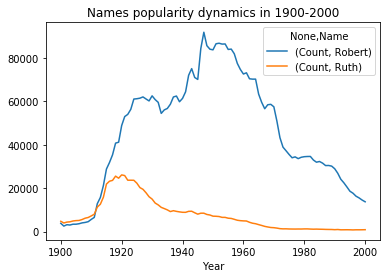

In [22]:
draw_line(1900, 2000, 'Ruth', 'Robert')

In [23]:
def draw_bar(start_year, end_year, step, *args):
    names_all = get_data_frame(start_year, end_year)
    names_sorted = names_all[names_all['Name'].isin(args)] 
    names_sorted = names_sorted.groupby(['Year', 'Name']).sum().unstack('Name')[::step]
    names_sorted.plot.bar()

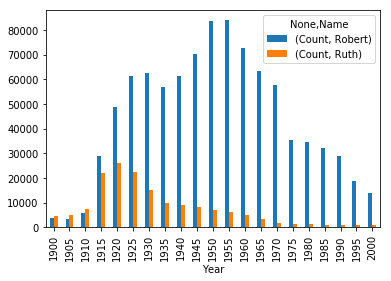

In [24]:
draw_bar(1900, 2000, 5, 'Ruth', 'Robert')

In [25]:
def draw_pie(year, letter):
    """
    Draws a pie chart of top 10 names distribution starting with a letter in a year
    """
    names_all = get_data_frame(year, year+1)
    names_with_r = names_all[names_all.Name.str.startswith(letter)].groupby('Name').sum().nlargest(10, 'Count')
    names_with_r_plot = names_with_r.plot(kind='pie', subplots=True, 
                                      title=f'Top 10 names starting with {letter} in {year}', legend=False)

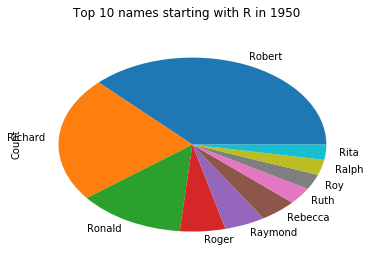

In [26]:
draw_pie(1950, 'R')

In [27]:
def draw_scatter(start_year, end_year):
    """
    Draws a scatter plot of names usage by number of consonants in them in selected years range
    """
    names_all = get_data_frame(start_year, end_year).groupby('Name', as_index=False).sum()
    pattern = 'B|C|D|F|G|H|J|K|L|M|N|P|Q|R|S|T|V|W|X|Z|b|c|d|f|g|h|j|k|l|m|n|p|q|r|s|t|v|w|x|z'
    names_all['Consonant'] = names_all['Name'].str.count(pattern)
    names_all.plot(kind='scatter', x='Consonant', y='Count')
    plt.xlabel('Number of consonants in a name')
    plt.ylabel('Count')
    plt.title(f'Names popularity by number of consonants in {start_year}-{end_year}')

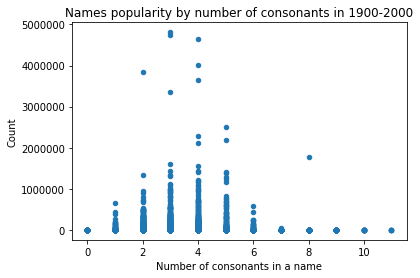

In [28]:
draw_scatter(1900,2000)